# Image Classification
The idea of this project is to train a Neural Network to classify images.

In [1]:
from data_manipulation.data_loader import DataLoader

data = DataLoader()


skere
Files already downloaded and verified
Files already downloaded and verified


NameError: name 'np' is not defined

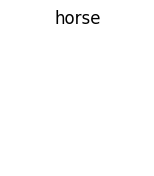

In [3]:
data.show_subplot()
